## Final Proyect - Deep Learning

### Donayd Correa C.

### Libs

In [1]:
import os, io, cv2
import numpy as np
import pandas as pd
import requests, zipfile

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

from base64 import b64decode
from IPython.display import Image
from IPython.display import display, Javascript

%matplotlib inline

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout

### Load Images

    + 5000 with mask
    + 5000 without mask

In [2]:
images_mask = os.path.join('./Train/Mask')
images_not_mask = os.path.join('./Train/NoMask')

images_mask_names = os.listdir(images_mask)
images_not_mask_names = os.listdir(images_not_mask)

print('Clasification Labels of Mask:', len(images_mask_names))
print('Images names: ')
for names in images_mask_names[:10]:
  print(' ', names)

print('\n Clasification Labels of No Mask:', len(images_not_mask_names))
print('Images names: ')
for names in images_not_mask_names[:10]:
  print(' ', names)

Clasification Labels of Mask: 5000
Images names: 
  00000_Mask.jpg
  00001_Mask.jpg
  00002_Mask.jpg
  00003_Mask.jpg
  00004_Mask.jpg
  00005_Mask.jpg
  00006_Mask.jpg
  00007_Mask.jpg
  00008_Mask.jpg
  00009_Mask.jpg

 Clasification Labels of No Mask: 5000
Images names: 
  35000_Mask_Nose_Mouth.jpg
  35001_Mask_Mouth_Chin.jpg
  35002_Mask_Mouth_Chin.jpg
  35003_Mask_Mouth_Chin.jpg
  35004_Mask_Mouth_Chin.jpg
  35005_Mask_Mouth_Chin.jpg
  35006_Mask_Mouth_Chin.jpg
  35007_Mask_Mouth_Chin.jpg
  35009_Mask_Mouth_Chin.jpg
  35010_Mask_Mouth_Chin.jpg


Mask Images


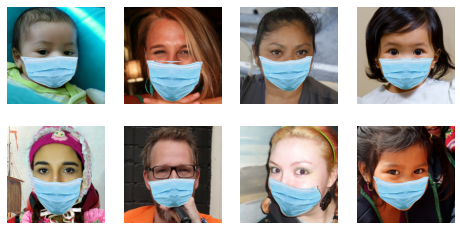


 No Mask Images


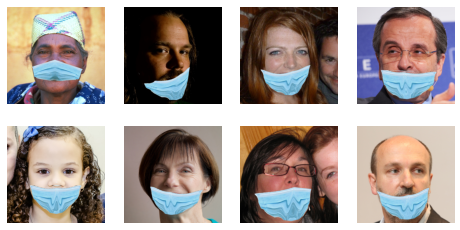

In [3]:
# Parameters for our graph; we'll output images in a 6x4 configuration
nrows = 2
ncols = 4


## Print mask images
print('Mask Images')
fig = plt.gcf()
fig.set_size_inches(ncols*2, nrows*2)
collage = []
collage += [os.path.join(images_mask, name) 
              for name in images_mask_names[0:8]]

for i, img_path in enumerate(collage):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()


## Print no mask images
print('\n No Mask Images')
fig = plt.gcf()
fig.set_size_inches(ncols*2, nrows*2)
collage = []
collage += [os.path.join(images_not_mask, name) 
              for name in images_not_mask_names[0:8]]

for i, img_path in enumerate(collage):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [4]:
dir = os.listdir('./Train')
print(dir)

['Mask', 'NoMask']


### Create the model

In [5]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 320x320 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(320, 320, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 
    # for 1 class ('Mask') and 1 for the other ('No Mask')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

# All images will be rescaled by 1./255
datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = datagen.flow_from_directory(
        './Train',  # This is the source directory for training images
        target_size=(320, 320),  
        batch_size=64,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        './Predict',
        target_size=(320, 320),  
        batch_size=64,
        class_mode='binary')

history = model.fit(
        train_generator,
        steps_per_epoch=8,  
        epochs=16,
        validation_data=validation_generator,
        validation_steps=8,
        verbose=1)

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/16
8/8 [==============================] - 62s 8s/step - loss: 0.7390 - accuracy: 0.5914 - val_loss: 0.6678 - val_accuracy: 0.5176
Epoch 2/16
8/8 [==============================] - 57s 7s/step - loss: 0.6189 - accuracy: 0.6916 - val_loss: 0.3419 - val_accuracy: 0.9414
Epoch 3/16
8/8 [==============================] - 56s 7s/step - loss: 0.2644 - accuracy: 0.9428 - val_loss: 0.4522 - val_accuracy: 0.8398
Epoch 4/16
8/8 [==============================] - 55s 7s/step - loss: 0.3654 - accuracy: 0.8917 - val_loss: 0.1995 - val_accuracy: 0.9375
Epoch 5/16
8/8 [==============================] - 57s 7s/step - loss: 0.1666 - accuracy: 0.9525 - val_loss: 0.1407 - val_accuracy: 0.9551
Epoch 6/16
8/8 [==============================] - 61s 8s/step - loss: 0.1277 - accuracy: 0.9409 - val_loss: 0.0802 - val_accuracy: 0.9590
Epoch 7/16
8/8 [==============================] - 63s 8s/step - loss: 0.0896 - accuracy

### Save the model as .h5

In [8]:
model.save("modelmask.h5")

### Test the model

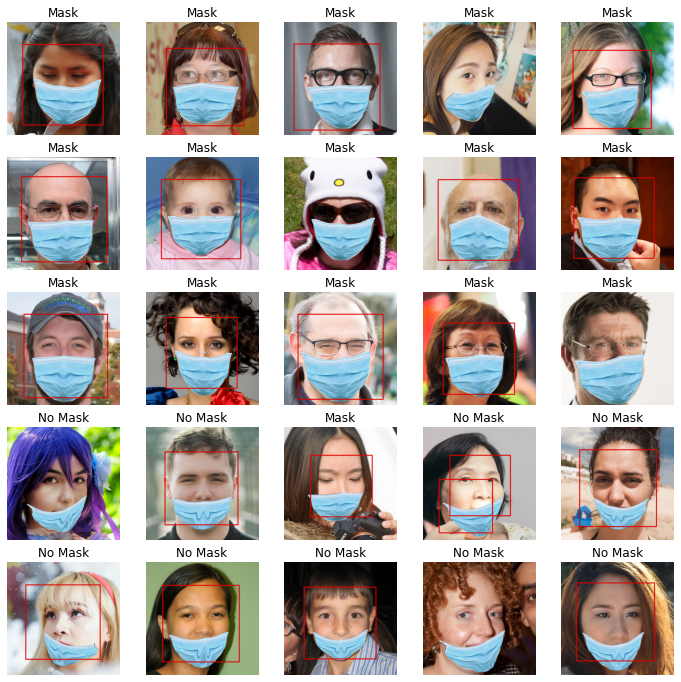

In [6]:
images_test = os.path.join('./Test')
images_test_names = os.listdir(images_test)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

fig = plt.gcf()
fig.set_size_inches(12, 12)

for i, img_path in enumerate(images_test_names[25:50]):
  
  rute = images_test + '/' + img_path
  sp = plt.subplot(5, 5, i + 1)
  sp.axis('Off')

  imagePred = image.load_img(rute, target_size=(320, 320))
  x = image.img_to_array(imagePred)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=64)
  className = classes[0][0]
  if className == 0:
    sp.set_title('Mask')
  else:
    sp.set_title('No Mask')

  img = mpimg.imread(rute)
  faces = face_cascade.detectMultiScale(img)
  for (x, y, w, h) in faces:
    if(w>x and h>y):
      cv2.rectangle(img, (x, y), (x+w, y+h), (225, 0, 0), 8)

  plt.imshow(img)

plt.show()

### Using the model

In [25]:
import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image

myModel = keras.models.load_model('modelmask.h5')
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades 
                                     + 'haarcascade_frontalface_default.xml')

In [67]:
cam = cv2.VideoCapture(0)
cv2.namedWindow("WebCamDetectMask")

font = cv2.FONT_HERSHEY_SIMPLEX
coord = (10, 40)
fontScale = 1
lineType  = 2

while True:
    
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
        
    imageTest = cv2.resize(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB), (320, 320))
    myImage = np.vstack([np.expand_dims(image.img_to_array(imageTest), axis=0)])  
    className = myModel.predict(myImage, batch_size=64)[0][0]

    faces = faceCascade.detectMultiScale(
        cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY),
        scaleFactor=1.2,
        minNeighbors=2,
        minSize=(100, 100)
    )
    
    # Draw a rectangle around the faces
    if className == 0:
        myClass = 'Mask'
        fontColor = (57, 143, 0)
    else:
        myClass = 'No Mask'
        fontColor = (42, 0, 200)
    
    if(len(faces)>1):
        x, y, w, h = faces[0]
    
    cv2.rectangle(frame, (x, y), (x+w, y+h), fontColor, 4)
    cv2.putText(frame, myClass, coord, font, fontScale, fontColor, lineType)    
    cv2.imshow("WebCamDetectMask", frame)
    k = cv2.waitKey(1)
    
    if k%256 == 27:
        # ESC pressed - Exit Program
        print("End of recognition")
        break
        
    elif k%256 == 32:
        # SPACE pressed - Take Shot
        print("Shot saved")
        cv2.imwrite("shot-{}.png".format(myClass), frame)
        
        
cam.release()
cv2.destroyAllWindows()

End of recognition
